In [1]:
# 环境准备
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 检查设备
if torch.backends.mps.is_available():
    device = torch.device("mps") #Apple Silicon Mac GPU加速
elif torch.cuda.is_available():
    device = torch.device("cuda") #GPU
else:
    device = torch.device("cpu") #CPU
    
# 设置中文字体-黑体 mac电脑
plt.rcParams['font.sans-serif'] = ['Heiti TC'] 
# 设置中文字体-黑体 windows电脑
# plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'KaiTi']

print(f"✅ 使用设备: {device}")
print("🐱🐶 本次任务：简单的猫狗图像分类")
print("✔ 环境准备完成，开始我们的AI之旅！")

✅ 使用设备: mps
🐱🐶 本次任务：简单的猫狗图像分类
✔ 环境准备完成，开始我们的AI之旅！


In [2]:
# 任务理解
print("🐱🐶 猫狗图像分类任务")
print("=" * 40)
print("数据集信息：")
print("• 从CIFAR-10数据集中提取猫和狗")
print("• 图片尺寸：32×32像素彩色图片") 
print("• 2个类别：猫 vs 狗")
print("• 训练快速，几分钟完成")

print("\n🤔 为什么这个任务适合新手？")
reasons = [
    "问题简单明确，容易理解",
    "图片尺寸小，训练快速", 
    "二分类问题，结果直观",
    "快速获得成就感，建立信心"
]

for i, reason in enumerate(reasons, 1):
    print(f"  {i}. {reason}")

print("\n🎯 学习目标：")
print("  掌握'加载数据 → 构建模型 → 训练 → 预测'的完整AI流程")

🐱🐶 猫狗图像分类任务
数据集信息：
• 从CIFAR-10数据集中提取猫和狗
• 图片尺寸：32×32像素彩色图片
• 2个类别：猫 vs 狗
• 训练快速，几分钟完成

🤔 为什么这个任务适合新手？
  1. 问题简单明确，容易理解
  2. 图片尺寸小，训练快速
  3. 二分类问题，结果直观
  4. 快速获得成就感，建立信心

🎯 学习目标：
  掌握'加载数据 → 构建模型 → 训练 → 预测'的完整AI流程


In [3]:
# 定义简单的数据预处理
# transforms.Compose用于将多个数据预处理操作组合在一起
transform = transforms.Compose([
    transforms.ToTensor(),  # 将PIL图像或numpy数组转换为PyTorch张量，同时自动将像素值从[0,255]缩放到[0,1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # 对图像进行标准化处理
    # 第一个元组(0.5,0.5,0.5)是RGB三个通道的均值
    # 第二个元组(0.5,0.5,0.5)是RGB三个通道的标准差
    # 标准化公式: (input - mean) / std
    # 经过这个变换后，像素值范围从[0,1]变为[-1,1]
])

print("📥 下载CIFAR-10数据集...")

# 加载训练集和测试集
# torchvision.datasets.CIFAR10用于下载和加载CIFAR-10数据集
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',        # 数据集下载和保存的根目录
    train=True,           # 设置为True表示加载训练集，False表示加载测试集
    download=True,        # 如果数据不存在则自动下载
    transform=transform   # 对数据应用上面定义的预处理变换
)

# 加载测试集
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',        # 数据集保存的目录（与训练集相同）
    train=False,          # 设置为False表示加载测试集
    download=True,        # 如果数据不存在则自动下载
    transform=transform   # 应用相同的数据预处理变换
)

print("✅ 数据集加载成功！")
print(f"训练集: {len(train_dataset)} 张图片")  
print(f"测试集: {len(test_dataset)} 张图片")  

# CIFAR-10的10个类别（使用中文标签）
# 元组中的每个字符串对应一个类别标签
classes = ('飞机', '汽车', '鸟', '猫', '鹿', '狗', '青蛙', '马', '船', '卡车')

print(f"所有类别: {classes}")  
print(f"猫的类别索引: {classes.index('猫')}") 
print(f"狗的类别索引: {classes.index('狗')}")  

📥 下载CIFAR-10数据集...
Files already downloaded and verified
Files already downloaded and verified
✅ 数据集加载成功！
训练集: 50000 张图片
测试集: 10000 张图片
所有类别: ('飞机', '汽车', '鸟', '猫', '鹿', '狗', '青蛙', '马', '船', '卡车')
猫的类别索引: 3
狗的类别索引: 5


In [4]:
# 创建猫狗二分类数据集（简化版）
def create_simple_cat_dog_dataset(dataset, max_samples=2000):
    """从CIFAR-10中提取猫和狗的图片，限制样本数量"""
    cat_images = []
    dog_images = []
    
    for image, label in dataset:
        if label == 3:  # 猫
            cat_images.append((image, 0))  # 猫标记为0
        elif label == 5:  # 狗
            dog_images.append((image, 1))  # 狗标记为1
    
    # 限制样本数量，让训练更快
    cat_images = cat_images[:max_samples//2]
    dog_images = dog_images[:max_samples//2]
    
    # 合并数据集
    combined_data = cat_images + dog_images
    
    return combined_data

print("🔍 创建简化版猫狗数据集...")
cat_dog_train = create_simple_cat_dog_dataset(train_dataset, 2000)
cat_dog_test = create_simple_cat_dog_dataset(test_dataset, 400)

print("✅ 猫狗数据集创建成功")
print(f"训练集: {len(cat_dog_train)} 张图片")
print(f"测试集: {len(cat_dog_test)} 张图片")
print(f"猫 vs 狗: {len(cat_dog_train)//2} 张 each")

🔍 创建简化版猫狗数据集...
✅ 猫狗数据集创建成功
训练集: 2000 张图片
测试集: 400 张图片
猫 vs 狗: 1000 张 each


📊 数据集探索
单张图片形状: torch.Size([3, 32, 32])
对应标签: 0 (猫)
像素值范围: [-0.914, 0.710]

🖼 显示训练集中的猫狗图片：


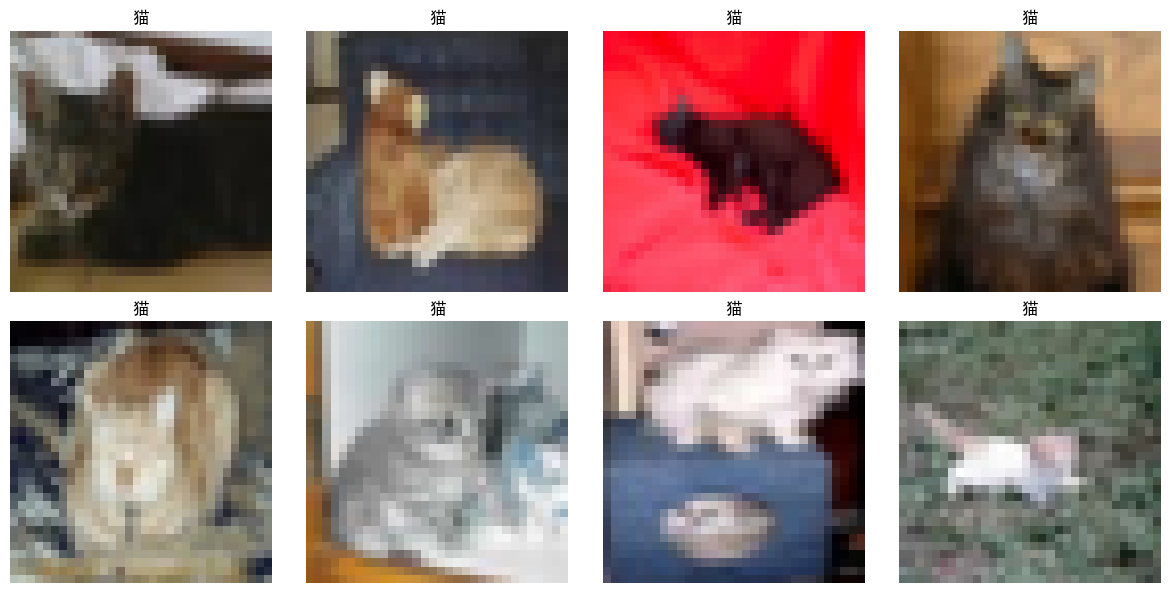


📈 类别分布统计：
猫: 1000 张 (50.0%)
狗: 1000 张 (50.0%)


In [5]:
# 查看数据集信息
print("📊 数据集探索")
print("=" * 30)

# 查看一张图片的信息
sample_image, sample_label = cat_dog_train[0]
print(f"单张图片形状: {sample_image.shape}")  # [通道, 高度, 宽度]
print(f"对应标签: {sample_label} ({'猫' if sample_label==0 else '狗'})")
print(f"像素值范围: [{sample_image.min():.3f}, {sample_image.max():.3f}]")

# 显示一些训练图片
def show_cat_dog_images(images, labels, n=8):
    """显示猫狗图片"""
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 4, i+1)
        # 反归一化：从[-1,1]变回[0,1]
        img = images[i] * 0.5 + 0.5
        img = np.transpose(img.numpy(), (1, 2, 0))  # 调整维度顺序
        plt.imshow(img)
        plt.title(f'{"猫" if labels[i]==0 else "狗"}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 显示前8张训练图片
print("\n🖼 显示训练集中的猫狗图片：")
sample_images = [cat_dog_train[i][0] for i in range(8)]
sample_labels = [cat_dog_train[i][1] for i in range(8)]
show_cat_dog_images(sample_images, sample_labels)

# 查看类别分布
print("\n📈 类别分布统计：")
labels = [label for _, label in cat_dog_train]
cat_count = labels.count(0)
dog_count = labels.count(1)
print(f"猫: {cat_count} 张 ({cat_count/len(labels)*100:.1f}%)")
print(f"狗: {dog_count} 张 ({dog_count/len(labels)*100:.1f}%)")

✅ 数据加载器创建成功
训练批次数: 63
测试批次数: 13
批大小: 32

🔍 查看一个批次的数据：
一个批次的图像形状: torch.Size([32, 3, 32, 32])
一个批次的标签形状: torch.Size([32])
前8个标签: [0, 1, 0, 0, 0, 0, 0, 1]

🖼 显示一个批次的图片：


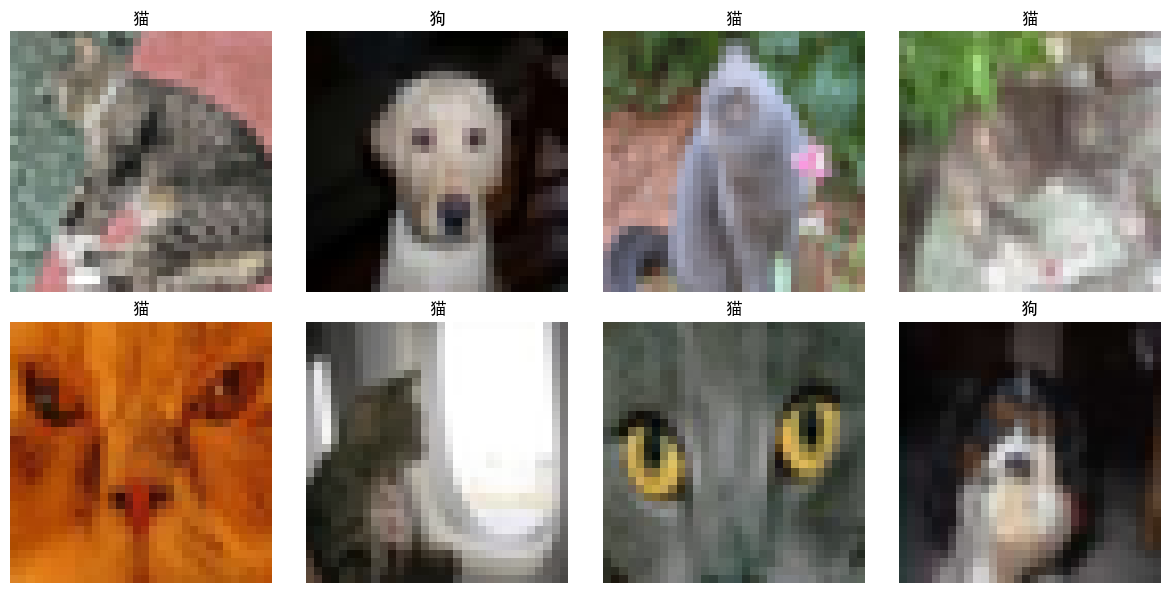

In [6]:
# 创建简单的数据加载器
batch_size = 32  # 每次训练32张图片

train_loader = DataLoader(
    cat_dog_train, 
    batch_size=batch_size,
    shuffle=True,  # 打乱顺序
)

test_loader = DataLoader(
    cat_dog_test, 
    batch_size=batch_size,
    shuffle=False, 
)

print("✅ 数据加载器创建成功")
print(f"训练批次数: {len(train_loader)}")
print(f"测试批次数: {len(test_loader)}")
print(f"批大小: {batch_size}")

# 查看一个批次的数据
print("\n🔍 查看一个批次的数据：")
data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"一个批次的图像形状: {images.shape}")  # [32, 3, 32, 32]
print(f"一个批次的标签形状: {labels.shape}")  # [32]
print(f"前8个标签: {labels[:8].tolist()}")

# 显示一个批次的图片
print("\n🖼 显示一个批次的图片：")
show_cat_dog_images(images[:8], labels[:8])

In [7]:
# 定义超级简单的CNN模型
class SimpleCatDogCNN(nn.Module):
    def __init__(self):
        super(SimpleCatDogCNN, self).__init__()
        
        # 简单的卷积层
        # 第一个卷积层
        # nn.Conv2d参数说明:
        # - 3: 输入通道数 (RGB图像的3个颜色通道)
        # - 16: 输出通道数 (卷积核的数量，每个卷积核会生成一个特征图)
        # - kernel_size=3: 卷积核大小3x3
        # - padding=1: 边缘填充1像素，保持特征图尺寸不变(32x32)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # 输入3通道，输出16通道，卷积核3x3
        
        # 第二个卷积层
        # 输入16通道(来自上一层的输出)，输出32通道
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        
        # 第一个全连接层
        # nn.Linear参数说明:
        # - 32*8*8: 输入特征数 (32个通道 * 8x8的特征图尺寸)
        # - 64: 输出特征数 (隐藏层神经元数量)
        # 32*8*8的计算过程: 原始图像32x32 -> 第一次池化后16x16 -> 第二次池化后8x8
        self.fc1 = nn.Linear(32 * 8 * 8, 64)  # 经过2次池化：32->16->8
        
        # 输出层
        # 输入64个特征，输出2个节点 (对应猫和狗两个类别)
        self.fc2 = nn.Linear(64, 2)  # 二分类输出
        
    def forward(self, x):
        # 前向传播函数，定义了数据如何通过网络
        
        # 第一个卷积块: 卷积 -> ReLU激活 -> 最大池化
        # torch.relu: ReLU激活函数，将负值置为0，正值保持不变
        # torch.max_pool2d(x, 2): 2x2最大池化，将特征图尺寸减半
        # 输入: 32x32 -> 输出: 16x16
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)  # 32x32 -> 16x16
        
        # 第二个卷积块: 同样进行卷积 -> ReLU -> 池化
        # 输入: 16x16 -> 输出: 8x8
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)  # 16x16 -> 8x8
        
        # 展平操作: 将多维特征图转换为一维向量
        
        x = x.view(-1, 32 * 8 * 8)
        
        # 全连接层
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

# 创建模型
model = SimpleCatDogCNN().to(device)

print("✅ 简单的CNN模型创建成功！")
print(f"模型结构:\n{model}")

# 计算参数数量
total_params = sum(p.numel() for p in model.parameters())
print(f"\n📊 模型参数统计:")
print(f"总参数: {total_params:,}")
print(f"可训练参数: {total_params:,}")

✅ 简单的CNN模型创建成功！
模型结构:
SimpleCatDogCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

📊 模型参数统计:
总参数: 136,354
可训练参数: 136,354


In [8]:
print("🧠 简单CNN结构理解")
print("=" * 50)

layers_info = [
    ("输入层", "3×32×32", "RGB彩色图片"),
    ("卷积层1", "16个3×3滤波器", "提取基础特征"), 
    ("ReLU激活", "-", "引入非线性"),
    ("最大池化", "2×2", "尺寸减半(32→16)"),
    ("卷积层2", "32个3×3滤波器", "提取更复杂特征"),
    ("ReLU激活", "-", "引入非线性"),
    ("最大池化", "2×2", "尺寸减半(16→8)"),
    ("全连接层1", "64个神经元", "综合特征"),
    ("ReLU激活", "-", "引入非线性"),
    ("输出层", "2个神经元", "猫/狗分类")
]

print(f"{'层名称':<15} {'参数/操作':<20} {'功能描述'}")
print("-" * 50)
for name, params, desc in layers_info:
    print(f"{name:<15} {params:<20} {desc}")

print(f"\n💡 CNN工作原理简单理解:")
print("• 卷积层: 像小探测器，在图片上滑动寻找特征")
print("• 池化层: 缩小图片，保留重要信息") 
print("• 全连接层: 把所有信息综合起来做判断")
print("• 最终输出: 两个分数，高的就是预测结果")

🧠 简单CNN结构理解
层名称             参数/操作                功能描述
--------------------------------------------------
输入层             3×32×32              RGB彩色图片
卷积层1            16个3×3滤波器            提取基础特征
ReLU激活          -                    引入非线性
最大池化            2×2                  尺寸减半(32→16)
卷积层2            32个3×3滤波器            提取更复杂特征
ReLU激活          -                    引入非线性
最大池化            2×2                  尺寸减半(16→8)
全连接层1           64个神经元               综合特征
ReLU激活          -                    引入非线性
输出层             2个神经元                猫/狗分类

💡 CNN工作原理简单理解:
• 卷积层: 像小探测器，在图片上滑动寻找特征
• 池化层: 缩小图片，保留重要信息
• 全连接层: 把所有信息综合起来做判断
• 最终输出: 两个分数，高的就是预测结果


In [9]:
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失，适合分类问题
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器

print("✅ 训练组件准备完成")
print(f"损失函数: 交叉熵损失")
print(f"优化器: Adam")
print(f"学习率: 0.001")

# 训练参数
num_epochs = 10  # 只训练10轮，快速看到效果
print(f"训练轮数: {num_epochs}")

✅ 训练组件准备完成
损失函数: 交叉熵损失
优化器: Adam
学习率: 0.001
训练轮数: 10


In [10]:
# 简单的训练函数
def train_simple_model():
    """训练模型"""
    print("🚀 开始训练模型...")
    print("=" * 50)
    
    # 初始化列表，用于记录每个epoch的训练损失和准确率
    train_losses = []
    train_accuracies = []
    
    # 循环遍历所有训练轮次
    for epoch in range(num_epochs):
        # 设置模型为训练模式
        # 这会启用dropout、batch normalization等训练特有的层
        model.train()
        
        # 初始化统计变量
        running_loss = 0.0  # 累计损失
        correct = 0         # 正确预测的样本数
        total = 0           # 总样本数
        
        # 遍历所有训练批次
        # enumerate(train_loader) 返回批次索引和批次数据
        # batch_idx: 批次索引 (0, 1, 2, ...)
        # (images, labels): 一个批次的图像和标签
        for batch_idx, (images, labels) in enumerate(train_loader):
            # 将数据移动到指定设备 (GPU/CPU/MPS)
            images, labels = images.to(device), labels.to(device)
            
            # 清零梯度 - 非常重要！
            # PyTorch会累积梯度，所以在每个批次开始前需要重置
            optimizer.zero_grad()
            
            # 前向传播: 将图像输入模型，得到预测输出
            # outputs的形状: [batch_size, num_classes]
            outputs = model(images)
            
            # 计算损失: 比较模型输出和真实标签
            # criterion通常是CrossEntropyLoss等损失函数
            loss = criterion(outputs, labels)
            
            # 反向传播: 计算损失相对于模型参数的梯度
            # 这会通过链式法则计算每个参数的梯度
            loss.backward()
            
            # 优化步骤: 根据梯度更新模型参数
            # optimizer会根据学习率等超参数更新权重
            optimizer.step()
            
            # 统计训练结果
            running_loss += loss.item()  # 累加损失值
            _, predicted = torch.max(outputs.data, 1)  # 获取预测类别
            total += labels.size(0)      # 累加样本总数
            correct += (predicted == labels).sum().item()  # 累加正确预测数
        
        # 计算当前epoch的平均损失和准确率
        epoch_loss = running_loss / len(train_loader)  # 平均损失
        epoch_acc = 100 * correct / total             # 准确率百分比
        
        # 记录当前epoch的结果
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # 打印训练进度
        print(f'轮次 [{epoch+1}/{num_epochs}]')
        print(f'  训练损失: {epoch_loss:.4f}')
        print(f'  训练准确率: {epoch_acc:.2f}%')
        print('-' * 40)
    
    print("✅ 训练完成！")
    return train_losses, train_accuracies

# 开始训练
train_losses, train_accuracies = train_simple_model()

🚀 开始训练模型...
轮次 [1/10]
  训练损失: 0.6769
  训练准确率: 57.80%
----------------------------------------
轮次 [2/10]
  训练损失: 0.6356
  训练准确率: 64.40%
----------------------------------------
轮次 [3/10]
  训练损失: 0.6042
  训练准确率: 66.15%
----------------------------------------
轮次 [4/10]
  训练损失: 0.5677
  训练准确率: 69.95%
----------------------------------------
轮次 [5/10]
  训练损失: 0.5247
  训练准确率: 74.15%
----------------------------------------
轮次 [6/10]
  训练损失: 0.4829
  训练准确率: 76.70%
----------------------------------------
轮次 [7/10]
  训练损失: 0.4287
  训练准确率: 79.65%
----------------------------------------
轮次 [8/10]
  训练损失: 0.3865
  训练准确率: 82.50%
----------------------------------------
轮次 [9/10]
  训练损失: 0.3433
  训练准确率: 84.75%
----------------------------------------
轮次 [10/10]
  训练损失: 0.3169
  训练准确率: 86.60%
----------------------------------------
✅ 训练完成！


In [11]:
def evaluate_simple_model():
    """评估模型在测试集上的表现"""
    model.eval()  # 评估模式
    test_loss = 0.0
    correct = 0
    total = 0
    
    print("🧪 在测试集上评估模型...")
    
    with torch.no_grad():  # 不计算梯度
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    
    print(f"测试集损失: {test_loss:.4f}")
    print(f"测试集准确率: {test_accuracy:.2f}%")
    print(f"正确分类: {correct}/{total}")
    
    return test_accuracy

# 评估模型
test_accuracy = evaluate_simple_model()

🧪 在测试集上评估模型...
测试集损失: 0.7018
测试集准确率: 70.25%
正确分类: 281/400


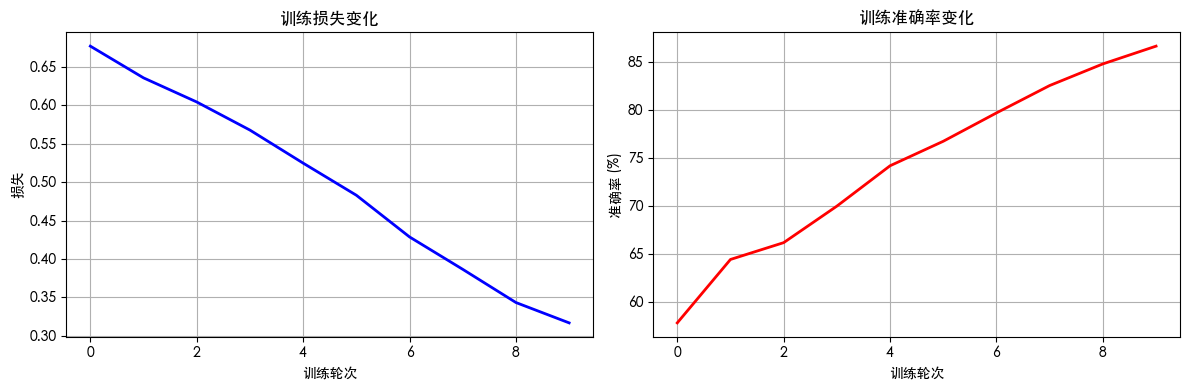

📈 训练结果分析:
• 最终训练准确率: 86.60%
• 最终测试准确率: 70.25%
• 过拟合程度: 16.35%


In [12]:
# 绘制训练过程
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b-', linewidth=2)
plt.title('训练损失变化')
plt.xlabel('训练轮次')
plt.ylabel('损失')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'r-', linewidth=2)
plt.title('训练准确率变化')
plt.xlabel('训练轮次')
plt.ylabel('准确率 (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("📈 训练结果分析:")
print(f"• 最终训练准确率: {train_accuracies[-1]:.2f}%")
print(f"• 最终测试准确率: {test_accuracy:.2f}%")
print(f"• 过拟合程度: {train_accuracies[-1] - test_accuracy:.2f}%")

🔍 查看预测结果：


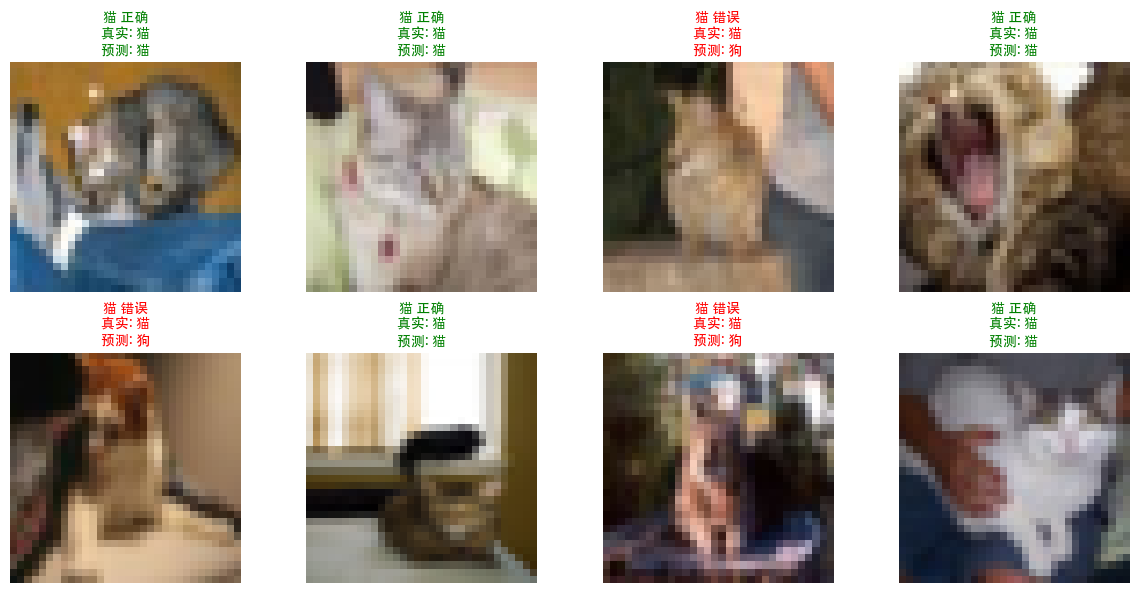

这个批次的准确率: 50.0% (16/32)


In [13]:
# 查看一些测试集的预测结果
def show_cat_dog_predictions():
    """显示猫狗预测结果"""
    model.eval()
    
    # 获取一个测试批次
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)
    
    # 预测
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
    
    # 显示前8个预测结果
    plt.figure(figsize=(12, 6))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        img = images[i].cpu() * 0.5 + 0.5  # 反归一化
        img = np.transpose(img.numpy(), (1, 2, 0))
        
        # 标记颜色：绿色正确，红色错误
        color = 'green' if predicted[i] == labels[i] else 'red'
        emoji = "猫" if labels[i] == 0 else "狗"
        status = "正确" if predicted[i] == labels[i] else "错误"
        
        true_label = "猫" if labels[i] == 0 else "狗"
        pred_label = "猫" if predicted[i] == 0 else "狗"
        
        plt.imshow(img)
        plt.title(f'{emoji} {status}\n真实: {true_label}\n预测: {pred_label}', 
                 color=color, fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # 统计这个批次的准确率
    correct_in_batch = (predicted == labels).sum().item()
    accuracy_in_batch = 100 * correct_in_batch / len(labels)
    print(f"这个批次的准确率: {accuracy_in_batch:.1f}% ({correct_in_batch}/{len(labels)})")

print("🔍 查看预测结果：")
show_cat_dog_predictions()

In [14]:
print("\n" + "="*60)
print("🎉 猫狗图像分类项目完成总结")
print("="*60)

achievements = [
    ("数据加载", "成功创建猫狗数据集"),
    ("数据探索", "查看猫狗图片和理解数据"), 
    ("模型构建", "创建了简单的CNN神经网络"),
    ("模型训练", "完成了10轮训练，学会了识别猫狗"),
    ("模型评估", "在测试集上验证了模型性能"),
    ("预测应用", "能够预测新的猫狗图片"),
    ("模型保存", "保存了训练好的模型")
]

print("✅ 完成的任务:")
for i, (task, desc) in enumerate(achievements, 1):
    print(f"  {i}. {task}: {desc}")

print(f"\n📊 项目成果:")
print(f"• 测试准确率: {test_accuracy:.2f}%")
print(f"• 模型参数: {total_params:,} 个")
print(f"• 训练时间: 约1-2分钟")

print(f"\n🎯 学习收获:")
print("• 理解了深度学习图像分类的基本流程")
print("• 学会了使用PyTorch构建和训练CNN模型") 
print("• 掌握了处理二分类问题的方法")
print("• 建立了继续学习AI的信心")

print(f"\n🌟 有趣的事实:")
print("• 计算机通过看数千张图片学会了区分猫狗")
print("• 模型学到的'特征'可能包括耳朵形状、鼻子等")
print("• 即使图片很小，AI也能找到区分的方法")

print(f"\n💡 下一步可以尝试:")
print("• 提高准确率到75%以上")
print("• 使用更大的图片数据集")
print("• 尝试更复杂的网络结构")
print("• 识别其他动物或物体")


🎉 猫狗图像分类项目完成总结
✅ 完成的任务:
  1. 数据加载: 成功创建猫狗数据集
  2. 数据探索: 查看猫狗图片和理解数据
  3. 模型构建: 创建了简单的CNN神经网络
  4. 模型训练: 完成了10轮训练，学会了识别猫狗
  5. 模型评估: 在测试集上验证了模型性能
  6. 预测应用: 能够预测新的猫狗图片
  7. 模型保存: 保存了训练好的模型

📊 项目成果:
• 测试准确率: 70.25%
• 模型参数: 136,354 个
• 训练时间: 约1-2分钟

🎯 学习收获:
• 理解了深度学习图像分类的基本流程
• 学会了使用PyTorch构建和训练CNN模型
• 掌握了处理二分类问题的方法
• 建立了继续学习AI的信心

🌟 有趣的事实:
• 计算机通过看数千张图片学会了区分猫狗
• 模型学到的'特征'可能包括耳朵形状、鼻子等
• 即使图片很小，AI也能找到区分的方法

💡 下一步可以尝试:
• 提高准确率到75%以上
• 使用更大的图片数据集
• 尝试更复杂的网络结构
• 识别其他动物或物体
